# 0.0 Imports

In [47]:
import inflection
import datetime
import pickle

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## 0.1 Help Functions

In [48]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [49]:
def quadro_estatistico_descritivo (numerical_attributes):
    # Medidas de Tendencia Central - Media e Mediana
    media = pd.DataFrame(numerical_attributes.apply(np.mean)).T
    mediana = pd.DataFrame(numerical_attributes.apply(np.median)).T

    # Medidas de Disperção - (Desvio Padrão)std, min, max, (Tamanho)range, (Amplitude)skew, kurtosis
    desvio_padrao = pd.DataFrame(numerical_attributes.apply(np.std)).T
    mínimo = pd.DataFrame(numerical_attributes.apply(min)).T
    máximo = pd.DataFrame(numerical_attributes.apply(max)).T
    distancia = pd.DataFrame(numerical_attributes.apply(lambda x: x.max() - x.min())).T
    assimetria = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew())).T
    curtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis())).T

    # concat
    estatistica = pd.concat( [mínimo, máximo, distancia, media, mediana, desvio_padrao, assimetria, curtosis] ).T.reset_index()
    estatistica.columns = ['atributes', 'mínimo', 'máximo', 'distancia', 'media', 'mediana', 'desvio_padrao', 'assimetria', 'curtosis']
    return estatistica

In [50]:
def quantidade_valores_unicos(df):
    for i in df:
        print(f'Atributos: {i} - {df[i].sort_values().nunique()}')

In [51]:
def quantidade_valores_duplicados(df):
    for i in df:
        valor_duplicado = df[i].sort_values().duplicated().sum()
        if valor_duplicado > 0:
            print(f'Atributos: {i} - {valor_duplicado}')
        else:
            continue

In [52]:
def verificar_valores_nan(df):
    for i in df:
        valor_nan = df[i].isna().sum()
        if valor_nan > 0:
            print(f'Atributos: {i} - {valor_nan}')
        else:
            continue

In [53]:
def ajuste_colunas(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df

## 0.2 Import Data

In [54]:
data_raw = pd.read_csv('../src/data/raw/zomato.csv')
data_raw.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,Botswana Pula(P),1,0,0,0,3,4.60,3F7E00,Excellent,619
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,Botswana Pula(P),1,0,0,0,3,4.60,3F7E00,Excellent,619
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"European, Asian",...,Botswana Pula(P),0,0,0,0,4,4.70,3F7E00,Excellent,469
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"Filipino, American, Italian, Bakery",...,Botswana Pula(P),0,0,0,0,3,4.40,5BA829,Very Good,867
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,American,...,Botswana Pula(P),0,0,0,0,3,4.40,5BA829,Very Good,858


# 1.0 Exploration

## 1.1 Verificação de Valores Na e Valores únicos

In [55]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7527 non-null   int64  
 1   Restaurant Name       7527 non-null   object 
 2   Country Code          7527 non-null   int64  
 3   City                  7527 non-null   object 
 4   Address               7527 non-null   object 
 5   Locality              7527 non-null   object 
 6   Locality Verbose      7527 non-null   object 
 7   Longitude             7527 non-null   float64
 8   Latitude              7527 non-null   float64
 9   Cuisines              7512 non-null   object 
 10  Average Cost for two  7527 non-null   int64  
 11  Currency              7527 non-null   object 
 12  Has Table booking     7527 non-null   int64  
 13  Has Online delivery   7527 non-null   int64  
 14  Is delivering now     7527 non-null   int64  
 15  Switch to order menu 

In [56]:
quantidade_valores_unicos(data_raw)

Atributos: Restaurant ID - 6942
Atributos: Restaurant Name - 5914
Atributos: Country Code - 15
Atributos: City - 125
Atributos: Address - 6760
Atributos: Locality - 2272
Atributos: Locality Verbose - 2357
Atributos: Longitude - 6846
Atributos: Latitude - 6833
Atributos: Cuisines - 2832
Atributos: Average Cost for two - 156
Atributos: Currency - 12
Atributos: Has Table booking - 2
Atributos: Has Online delivery - 2
Atributos: Is delivering now - 2
Atributos: Switch to order menu - 1
Atributos: Price range - 4
Atributos: Aggregate rating - 30
Atributos: Rating color - 7
Atributos: Rating text - 28
Atributos: Votes - 1739


In [57]:
quantidade_valores_duplicados(data_raw)

Atributos: Restaurant ID - 585
Atributos: Restaurant Name - 1613
Atributos: Country Code - 7512
Atributos: City - 7402
Atributos: Address - 767
Atributos: Locality - 5255
Atributos: Locality Verbose - 5170
Atributos: Longitude - 681
Atributos: Latitude - 694
Atributos: Cuisines - 4694
Atributos: Average Cost for two - 7371
Atributos: Currency - 7515
Atributos: Has Table booking - 7525
Atributos: Has Online delivery - 7525
Atributos: Is delivering now - 7525
Atributos: Switch to order menu - 7526
Atributos: Price range - 7523
Atributos: Aggregate rating - 7497
Atributos: Rating color - 7520
Atributos: Rating text - 7499
Atributos: Votes - 5788


In [58]:
verificar_valores_nan(data_raw)

Atributos: Cuisines - 15


In [59]:
# foi identificado diversas linhas duplicadas
data_raw = data_raw.drop_duplicates(subset='Restaurant ID')

## 1.2 Verificação de Atributos Numéricos e Categóricos

In [60]:
numerical_attributes = data_raw.select_dtypes( include = ['int64', 'float64'] )
categorical_attributes = data_raw.select_dtypes( exclude = ['int64', 'float64'])

### 1.2.1 Verificação dos atributos numéricos

In [61]:
quadro_estatitico = quadro_estatistico_descritivo(numerical_attributes)
quadro_estatitico

,atributes,mínimo,máximo,distancia,media,mediana,desvio_padrao,assimetria,curtosis
0,Restaurant ID,549.00,19040277.00,19039728.00,10761928.71,7900186.50,7037181.43,-0.14,-1.71
1,Country Code,1.00,216.00,215.00,95.79,30.00,99.29,0.21,-1.87
2,Longitude,-122.70,175.31,298.01,31.44,73.76,79.05,-0.61,-0.73
3,Latitude,-41.33,55.98,97.31,19.43,25.27,23.50,-1.08,0.55
4,Average Cost for two,0.00,25000017.00,25000017.00,7506.58,250.00,302229.72,81.50,6737.98
5,Has Table booking,0.00,1.00,1.00,0.06,0.00,0.24,3.69,11.60
6,Has Online delivery,0.00,1.00,1.00,0.35,0.00,0.48,0.63,-1.60
7,Is delivering now,0.00,1.00,1.00,0.17,0.00,0.38,1.71,0.94
8,Switch to order menu,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Price range,1.00,4.00,3.00,2.63,3.00,0.97,-0.06,-1.00


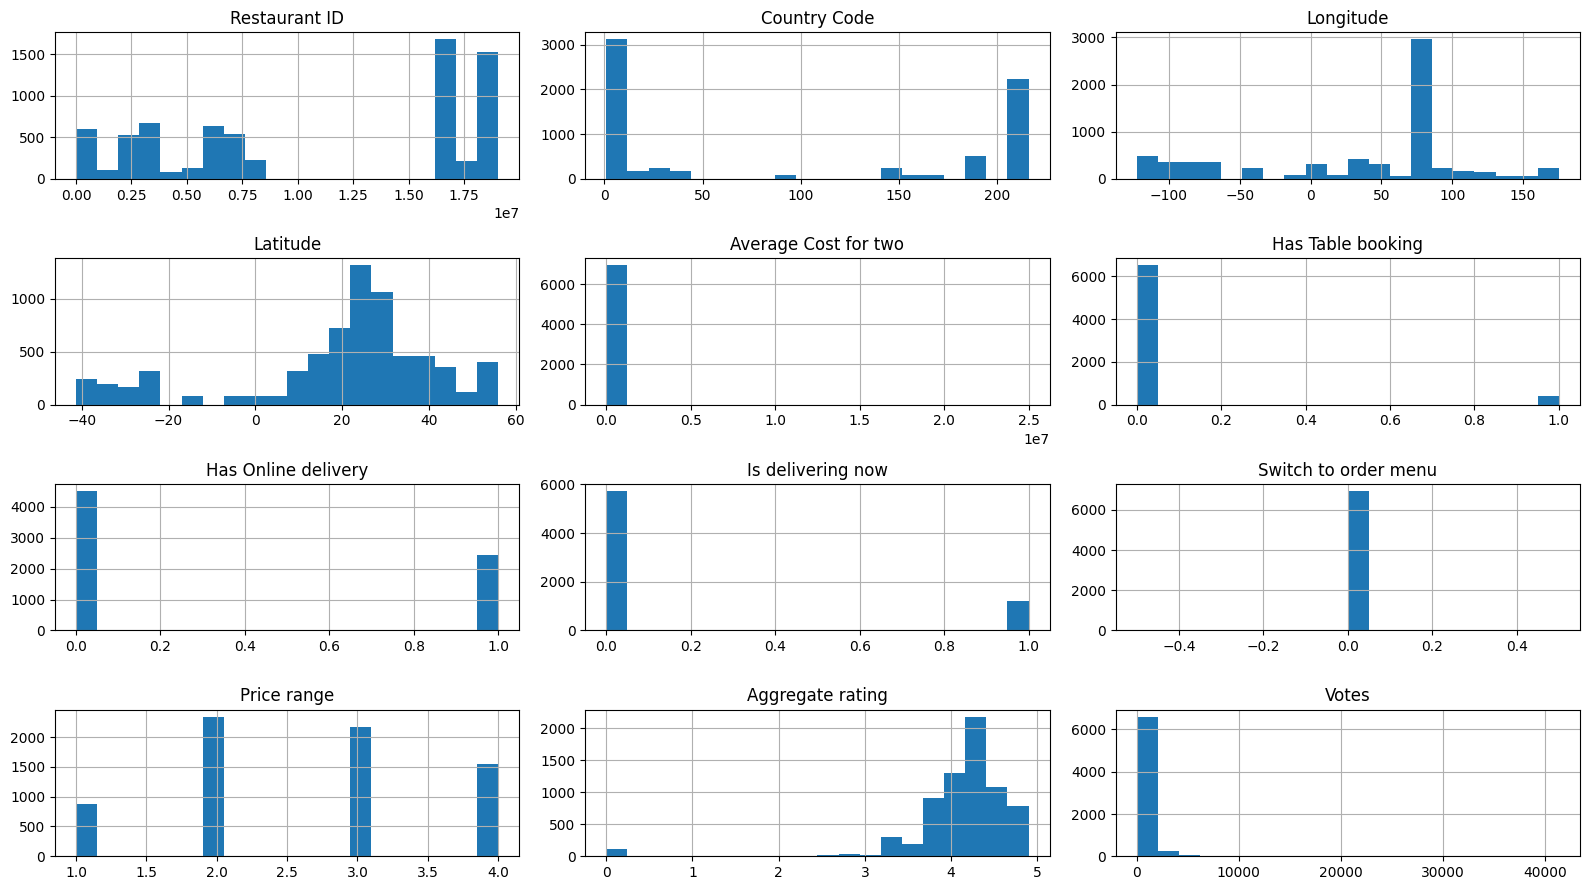

In [62]:
numerical_attributes.hist(figsize=(16,9), bins=20)
plt.tight_layout()

Dados numéricos:
1. Restaurant ID: Sem necessidade de transformação
2. Country Code: Colocar em uma coluna auxiliar o nome dos países, com referência do country code.
3. Longitude: Sem necessidade de transformação
4. Longitude: Sem necessidade de transformação
5. Average Cost for two: Atualizar todos os valores monetários para um único valor. Há alguns outliers que podem ser só a variação deste valor monetário. Caso não seja variação do valor monetário, verificar outras hipóteses. Há uma única exceção que é o maior valor, no index[385] ele está em dollar e o valor é muito exorbitante
6. Has Table booking: Sem necessidade de transformação
7. Has Online delivery: Sem necessidade de transformação
8. Is delivering now: Sem necessidade de transformação
9. Switch to order menu: Sem necessidade de transformação
10. Price range: Sem necessidade de transformação
11. Aggregate rating: Sem necessidade de transformação
12. Votes: Sem necessidade de transformação

### 1.2.2 Verificação dos atributos categóricos

In [63]:
#categoricos = data_raw[['Cuisines']]
#valores_unicos_categoricos = quantidade_valores_unicos(categoricos)
#valores_unicos_categoricos

Dados Categóricos:
1. Restaurant Name: Sem necessidade de transformação.
2. City: Sem necessidade de transformação.
3. Address: Sem necessidade de transformação.
4. Locality Verbose: Sem necessidade de transformação.
5. Cuisines: Possui vários valores distintos em uma única linha. Foi identificado que só precisamo da cosinha principal, que é a primeira cosinha
6. Currency: (Cada moeda, foi registrada com o seu valor local) Sem necessidade de transformação, a não ser que queira separa o nome do pais do formato da moeda.
7. Rating color: Modificar a cor de exadecimal para nome.
8. Rating text: Traduzir tudo para uma única lingua. Gerar uma classificação mais ordenada. Aplicar a classificação trocando os valores.

# 2.0 Aplicação de mudanças propostas

## 2.1 Mudanças nos atributos numéricos

### 2.1.1 Criação da coluna paises

In [64]:
# Criação do dataframe países para unir com data_raw
paises = { 'Country Code':[ 1, 14, 30, 37, 94, 148, 162, 166, 184, 189, 191, 208, 214, 215, 216],
              'Name Country':[ "India", "Australia", "Brazil", "Canada", "Indonesia", "New Zeland", "Philippines", "Qatar", "Singapure", "South Africa", "Sri Lanka", "Turkey", "United Arab Emirates", "England", "United States of America"]}
paises = pd.DataFrame(paises)
paises

,Country Code,Name Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zeland
6,162,Philippines
7,166,Qatar
8,184,Singapure
9,189,South Africa


In [65]:
# União entre os datafreames data_raw e países pela coluna "country code"
data_raw = data_raw.merge(paises, on='Country Code', how='inner')
data_raw.sample(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Country
3240,3000107,Haribhavanam,1,Coimbatore,"2, Bharathi Colony, Peelamedu, Coimbatore",Peelamedu,"Peelamedu, Coimbatore",77.00,11.02,"South Indian, Chettinad, North Indian",...,0,1,0,0,2,4.30,5BA829,Very Good,685,India
925,16970796,Pappadeaux Seafood Kitchen,216,Denver,7520 East. Progress Place 80111,Greenwood Village,"Greenwood Village, Denver",-104.90,39.62,"Seafood, Cajun",...,0,0,0,0,3,4.40,5BA829,Very Good,185,United States of America
6736,5801097,Giovanni's,191,Colombo,"145, Thimbirigasyaya Road, Havelock Town, Colo...","Havelock Town, Colombo 05","Havelock Town, Colombo 05, Colombo",79.87,6.89,"Pizza, Italian",...,0,0,0,0,3,4.50,3F7E00,Excellent,160,Sri Lanka
1809,16718525,Portage Bay Cafe,216,Seattle,"University Inn, 4130 Roosevelt Way NE, Seattle...",University District,"University District, Seattle",-122.32,47.66,American,...,0,0,0,0,2,4.30,5BA829,Very Good,923,United States of America
626,16913031,Kerbey Lane Cafe - South,216,Austin,3003 South Lamar Boulevard 78704,South Lamar,"South Lamar, Austin",-97.78,30.24,"Diner, Tex-Mex",...,0,0,0,0,2,4.30,5BA829,Very Good,482,United States of America
802,18076874,Wildberry Pancakes & Cafe,216,Chicago,1383 N Meacham Road 60173,Schaumburg,"Schaumburg, Chicago",-88.04,42.06,American,...,0,0,0,0,2,4.50,3F7E00,Excellent,131,United States of America
498,16599818,Silver Sushi,14,Perth,"1/41 Burrendah Boulevard, Willeton, Perth, Wil...",Willetton,Willetton,115.88,-32.06,Japanese,...,0,0,0,0,2,4.20,5BA829,Very Good,426,Australia
4189,18596017,The Night Factory,1,Ludhiana,"Near HDFC Bank, BRS Nagar, Ludhiana",BRS Nagar,"BRS Nagar, Ludhiana",75.80,30.89,"North Indian, Desserts, Beverages, Biryani, Pi...",...,0,1,0,0,2,4.00,5BA829,Very Good,670,India
4855,4000269,McDonald's,1,Patna,"BR Patna Elphinstone, Elphinstone Picture Pala...",Golambar,"Golambar, Patna",85.15,25.62,"Burger, Fast Food",...,0,0,0,0,2,4.40,5BA829,Very Good,612,India
5166,18704343,Sher-e-Punjab,1,Shimla,"Middle Bazaar, The Mall, Longwood, Shimla",Longwood,"Longwood, Shimla",77.17,31.10,North Indian,...,0,0,0,0,1,3.20,CDD614,Average,12,India


### 2.1.2 Melhora do entendimento nos valores relacionados ao Currency

In [66]:
# Verificação de outliers antes da mudança do currency
# Foram realizadas várias verificações afim de conhecer melhor os dados
data_raw.loc[(data_raw['Average Cost for two']>1000) & (data_raw['Currency'] == 'Rand(R)'),['Restaurant Name', 'City', 'Locality', 'Name Country','Currency','Average Cost for two']].sort_values(by='Average Cost for two',ascending=False)#.groupby('Name Country').count().reset_index()

,Restaurant Name,City,Locality,Name Country,Currency,Average Cost for two
6655,Restaurant Mosaic @ The Orient,Pretoria,West Park,South Africa,Rand(R),3210
6407,The Test Kitchen,Cape Town,"Old Biscuit Mill, Woodstock",South Africa,Rand(R),2800
6595,Fermier Restaurant,Pretoria,Die Wilgers,South Africa,Rand(R),1100


In [67]:
data_raw['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [68]:
# Criação do dataframe para conversão das moedas
conversao_moeda = {'Currency': ['Brazilian Real(R$)', 'Botswana Pula(P)', 'Dollar($)', 'Emirati Diram(AED)','Indian Rupees(Rs.)', 'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(£)', 'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)', 'Turkish Lira(TL)'],
                    'Indice de correcao': [1, 2.75, 0.2, 0.74, 16.83, 3117.62, 0.33, 0.16, 0.73, 3.80, 65.68, 5.50]}
conversao_moeda = pd.DataFrame(conversao_moeda)
conversao_moeda

,Currency,Indice de correcao
0,Brazilian Real(R$),1.00
1,Botswana Pula(P),2.75
2,Dollar($),0.20
3,Emirati Diram(AED),0.74
4,Indian Rupees(Rs.),16.83
5,Indonesian Rupiah(IDR),3117.62
6,NewZealand($),0.33
7,Pounds(£),0.16
8,Qatari Rial(QR),0.73
9,Rand(R),3.80


In [69]:
# União entre os datafreames data_raw e países pela coluna "country code"
data_raw = data_raw.merge(conversao_moeda, on='Currency', how='inner')
data_raw.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Country,Indice de correcao
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,0,0,0,3,4.60,3F7E00,Excellent,619,Philippines,2.75
1,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"European, Asian",...,0,0,0,4,4.70,3F7E00,Excellent,469,Philippines,2.75
2,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"Filipino, American, Italian, Bakery",...,0,0,0,3,4.40,5BA829,Very Good,867,Philippines,2.75
3,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,American,...,0,0,0,3,4.40,5BA829,Very Good,858,Philippines,2.75
4,6304833,Manam,162,Makati City,"Level 1, Greenbelt 2, Ayala Center, Greenbelt,...","Greenbelt 2, San Lorenzo, Makati City","Greenbelt 2, San Lorenzo, Makati City, Makati ...",121.02,14.55,Filipino,...,0,0,0,3,4.70,3F7E00,Excellent,930,Philippines,2.75
5,18409457,Soban K-Town Grill,162,Makati City,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,"Korean, Grill",...,0,0,0,3,4.70,3F7E00,Excellent,935,Philippines,2.75
6,18607559,Bluesmith Coffee & Kitchen,162,Makati City,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,"American, Filipino, Coffee",...,0,0,0,3,4.00,5BA829,Very Good,340,Philippines,2.75
7,6314001,Motorino Pizzeria Napoletana,162,Makati City,"Level 2, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,"Pizza, Italian",...,1,1,0,3,4.30,5BA829,Very Good,449,Philippines,2.75
8,18189398,Shi Lin,162,Makati City,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,Taiwanese,...,1,0,0,3,4.10,5BA829,Very Good,201,Philippines,2.75
9,6318945,Nikkei,162,Makati City,"Unit GO3, Frabelle Business Center, 111 Rada S...",Legaspi Village,"Legaspi Village, Makati City",121.02,14.56,"Japanese, Latin American",...,0,0,0,4,4.60,3F7E00,Excellent,394,Philippines,2.75


In [70]:
# Calculo para a correção dos dados
data_raw['Custo para dois corrigido'] = data_raw.apply(lambda x : x['Average Cost for two'] / x['Indice de correcao'], axis =1)
data_raw[['Custo para dois corrigido']]

,Custo para dois corrigido
0,400.00
1,1127.27
2,290.91
3,254.55
4,254.55
...,...
6937,54.55
6938,8.18
6939,25.45
6940,17.27


In [71]:
# Remoção do outlier que realmente estava bem fora do padrão.
# Considero que todos os outros valoes estão em um padrão aceitável, até porque existem restaurantes que conseguimos
# gastas muito dinheiro. 
data_raw = data_raw.loc[(data_raw['Custo para dois corrigido'] < 2000),:]
data_raw.shape

(6931, 24)

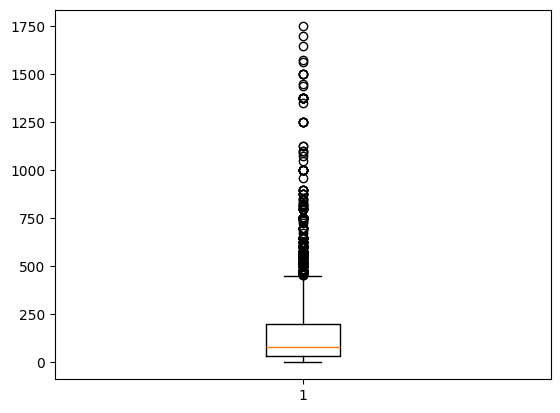

In [72]:
# Verificação dos outliers
plt.boxplot(data_raw['Custo para dois corrigido']);

### 2.1.3 Nova tabela Estatística

In [73]:
# Nova verificação do quadro estatístico
numerical_attributes = data_raw.select_dtypes( include = ['int64', 'float64'] )

In [74]:
quadro_estatitico = quadro_estatistico_descritivo(numerical_attributes)
quadro_estatitico

,atributes,mínimo,máximo,distancia,media,mediana,desvio_padrao,assimetria,curtosis
0,Restaurant ID,549.00,19040277.00,19039728.00,10752930.58,7900150.00,7037903.10,-0.14,-1.71
1,Country Code,1.00,216.00,215.00,95.65,30.00,99.29,0.21,-1.87
2,Longitude,-122.70,175.31,298.01,31.46,73.76,79.01,-0.62,-0.73
3,Latitude,-41.33,55.98,97.31,19.44,25.27,23.50,-1.08,0.55
4,Average Cost for two,0.00,1200000.00,1200000.00,3909.91,250.00,36799.70,14.12,271.19
5,Has Table booking,0.00,1.00,1.00,0.06,0.00,0.24,3.69,11.62
6,Has Online delivery,0.00,1.00,1.00,0.35,0.00,0.48,0.63,-1.61
7,Is delivering now,0.00,1.00,1.00,0.17,0.00,0.38,1.71,0.93
8,Switch to order menu,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Price range,1.00,4.00,3.00,2.63,3.00,0.97,-0.05,-1.00


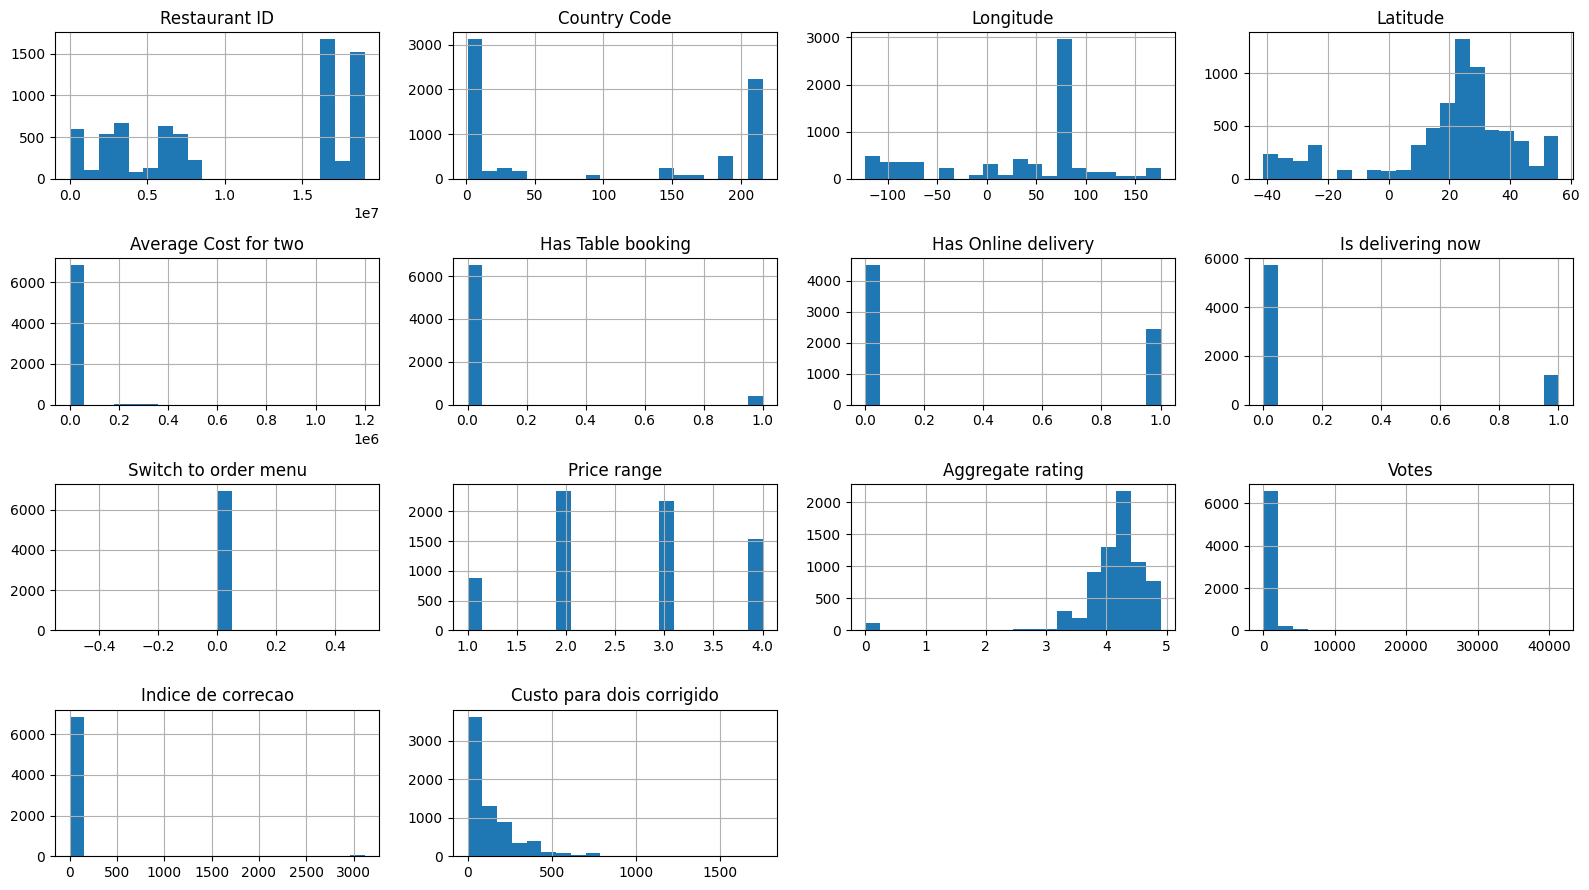

In [75]:
numerical_attributes.hist(figsize=(16,9), bins=20)
plt.tight_layout()

### 2.1.4 Retirar colunas

Podemos retirar as colunas:
1. Average Cost for two: Já foi feito a correção para um valor padrão
2. Switch to order menu: Não há outros valores além de 0. Caso seja preciso é só criar uma coluna = 0.0
3. Indice de correcao: Já foi utilizado e não irei precisar mais dele

In [76]:
colunas_numerica_drop = ['Average Cost for two', 'Switch to order menu', 'Indice de correcao']
data_raw = data_raw.drop( columns = colunas_numerica_drop)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6931 entries, 0 to 6941
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Restaurant ID              6931 non-null   int64  
 1   Restaurant Name            6931 non-null   object 
 2   Country Code               6931 non-null   int64  
 3   City                       6931 non-null   object 
 4   Address                    6931 non-null   object 
 5   Locality                   6931 non-null   object 
 6   Locality Verbose           6931 non-null   object 
 7   Longitude                  6931 non-null   float64
 8   Latitude                   6931 non-null   float64
 9   Cuisines                   6918 non-null   object 
 10  Currency                   6931 non-null   object 
 11  Has Table booking          6931 non-null   int64  
 12  Has Online delivery        6931 non-null   int64  
 13  Is delivering now          6931 non-null   int64  
 1

## 2.2 Mudança nos atributos categóricos

### 2.2.1 Mudança do atributo rating text

In [77]:
# A escala utilizada será -> Não avaliado, Ruim, Normal, Bom, Muito Bom, Excelente
mudanca_rating_text = {
    'Rating text': ['Average', 'Baik', 'Bardzo dobrze', 'Biasa', 'Bom', 'Bueno', 'Buono', 'Eccellente', 'Excelente', 'Excellent', 'Good', 'Harika', 'Muito Bom', 'Muito bom', 'Muy Bueno', 'Not rated', 'Poor', 'Sangat Baik', 'Skvělá volba', 'Skvělé', 'Terbaik', 'Velmi dobré', 'Very Good', 'Veľmi dobré', 'Vynikajúce', 'Wybitnie', 'Çok iyi', 'İyi'],
    'Avalicao texto': ['Normal', 'Bom', 'Muito bom', 'Normal', 'Bom', 'Bom', 'Bom', 'Excelente', 'Excelente', 'Excelente', 'Bom', 'Muito Bom', 'Muito Bom', 'Muito Bom', 'Muito Bom', 'Não Avaliado', 'Ruim', 'Muito Bom', 'Excelente', 'Muito Bom', 'Excelente', 'Muito Bom', 'Muito Bom', 'Muito Bom', 'Excelente', 'Excelente', 'Muito Bom', 'Bom']
}
mudanca_rating_text = pd.DataFrame(mudanca_rating_text)
mudanca_rating_text

,Rating text,Avalicao texto
0,Average,Normal
1,Baik,Bom
2,Bardzo dobrze,Muito bom
3,Biasa,Normal
4,Bom,Bom
5,Bueno,Bom
6,Buono,Bom
7,Eccellente,Excelente
8,Excelente,Excelente
9,Excellent,Excelente


In [78]:
# União entre os datafreames data_raw e mudanca_rating_text pela coluna "Rating text"
data_raw = data_raw.merge(mudanca_rating_text, on='Rating text', how='inner')
data_raw.sample(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Country,Custo para dois corrigido,Avalicao texto
5984,2700779,Sardar Fast Food Plaza,1,Ranchi,"Opposite Lalpur Thana, Lalpur, Ranchi",Lalpur,"Lalpur, Ranchi",85.33,23.37,"Chinese, North Indian, Biryani, Fast Food",...,1,1,1,3.90,9ACD32,Good,384,India,14.85,Bom
6431,16541271,Shahrzad Palace,214,Fujairah,"Next to Clifton International Hotel, Hamad Bin...",Fujairah City,"Fujairah City, Fujairah",56.32,25.12,Iranian,...,0,0,3,3.30,CDD614,Average,27,United Arab Emirates,189.19,Normal
1586,6901292,Urban Coffee Company,215,Birmingham,"30 Church Street, Colmore Business District, B...",Colmore Business District,"Colmore Business District, Birmingham",-1.90,52.48,Cafe,...,0,0,2,4.50,3F7E00,Excellent,29,England,125.00,Excelente
6089,2800398,Real Deepak Punjabi Dhaba,1,Vizag,"Tirumala Arcade, Near Asilmetta Junction, Ram ...",Ram Nagar,"Ram Nagar, Vizag",83.31,17.72,"North Indian, Biryani, Chinese",...,0,0,2,3.90,9ACD32,Good,590,India,41.59,Bom
2052,16913120,Lamberts Downtown Barbecue,216,Austin,"401 W 2nd Street, Austin 78701",Downtown,"Downtown, Austin",-97.75,30.27,BBQ,...,0,0,4,4.20,5BA829,Very Good,443,United States of America,500.00,Muito Bom
2278,16879505,Baba Yega Cafe,216,Houston,2607 Grant Street 77006,Montrose,"Montrose, Houston",-95.39,29.75,New American,...,0,0,4,4.30,5BA829,Very Good,376,United States of America,300.00,Muito Bom
6049,3900039,Sri Annapurna,1,Varanasi,"J-12/16-A, Ramkatora Near Hotel Gautam, Jaitpu...",Jaitpura,"Jaitpura, Varanasi",83.00,25.32,"North Indian, South Indian",...,1,0,3,3.90,9ACD32,Good,177,India,41.59,Bom
6182,7600670,Kalpna,215,Edinburgh,"2-3 Patrick Square, Old Town, Edinburgh EH8 9EZ",Old Town,"Old Town, Edinburgh",-3.18,55.94,"Indian, North Indian",...,0,0,3,3.80,9ACD32,Good,59,England,187.50,Bom
3238,2600340,Da pizzeria,1,Bhopal,"177, Zone 2, Maharana Pratap Nagar, Bhopal",Maharana Pratap Nagar,"Maharana Pratap Nagar, Bhopal",77.44,23.23,"Pizza, Italian, Fast Food",...,1,1,2,4.10,5BA829,Very Good,702,India,29.71,Muito Bom
2559,17153457,Guenther House,216,San Antonio,"205 E Guenther Street, San Antonio 78204",King William,"King William, San Antonio",-98.50,29.41,American,...,0,0,2,4.40,5BA829,Very Good,494,United States of America,125.00,Muito Bom


### 2.2.2 Mundaça do atribulo Cuisines

In [79]:
data_raw["Cuisines"].fillna('Cozinha não encontrada', inplace=True)
data_raw[data_raw['Cuisines'].isna()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Country,Custo para dois corrigido,Avalicao texto


In [80]:
data_raw.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Rating color',
       'Rating text', 'Votes', 'Name Country', 'Custo para dois corrigido',
       'Avalicao texto'],
      dtype='object')

In [81]:
data_raw["cuisines"] = data_raw.loc[:, "Cuisines"].apply(lambda x: x.split(",")[0])

In [82]:
data_raw["cuisines"]

0               Italian
1              European
2              Filipino
3                Korean
4              Japanese
             ...       
6926               Cafe
6927           Japanese
6928              Grill
6929    Restaurant Cafe
6930      World Cuisine
Name: cuisines, Length: 6931, dtype: object

### 2.2.3 Mudança do atributo Rating color

In [83]:
cores_hex = {"Rating color": ["3F7E00", "5BA829", "9ACD32", "CDD614", "FFBA00", "CBCBC8", "FF7800"],
             "Nome cor": ["Verde Escuro", "Verde", "Verde Claro", "Laranja", "Vermelho", "Cinza Claro", "Vermelho Escuro"]}
cores_hex = pd.DataFrame(cores_hex)
cores_hex

,Rating color,Nome cor
0,3F7E00,Verde Escuro
1,5BA829,Verde
2,9ACD32,Verde Claro
3,CDD614,Laranja
4,FFBA00,Vermelho
5,CBCBC8,Cinza Claro
6,FF7800,Vermelho Escuro


In [84]:
data_raw = data_raw.merge(cores_hex, on='Rating color', how='inner')

### 2.2.4 Retirar colunas

In [85]:
colunas_categoricas_drop = ['Cuisines', 'Rating text']
data_raw = data_raw.drop( columns = colunas_categoricas_drop)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931 entries, 0 to 6930
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Restaurant ID              6931 non-null   int64  
 1   Restaurant Name            6931 non-null   object 
 2   Country Code               6931 non-null   int64  
 3   City                       6931 non-null   object 
 4   Address                    6931 non-null   object 
 5   Locality                   6931 non-null   object 
 6   Locality Verbose           6931 non-null   object 
 7   Longitude                  6931 non-null   float64
 8   Latitude                   6931 non-null   float64
 9   Currency                   6931 non-null   object 
 10  Has Table booking          6931 non-null   int64  
 11  Has Online delivery        6931 non-null   int64  
 12  Is delivering now          6931 non-null   int64  
 13  Price range                6931 non-null   int64

## 2.3 Ajuste das colunas

In [86]:
data_raw = ajuste_colunas(data_raw)
data_raw

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,currency,...,is_delivering_now,price_range,aggregate_rating,rating_color,votes,name_country,custo_para_dois_corrigido,avalicao_texto,cuisines,nome_cor
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Botswana Pula(P),...,0,3,4.60,3F7E00,619,Philippines,400.00,Excelente,Italian,Verde Escuro
1,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,Botswana Pula(P),...,0,4,4.70,3F7E00,469,Philippines,1127.27,Excelente,European,Verde Escuro
2,6304833,Manam,162,Makati City,"Level 1, Greenbelt 2, Ayala Center, Greenbelt,...","Greenbelt 2, San Lorenzo, Makati City","Greenbelt 2, San Lorenzo, Makati City, Makati ...",121.02,14.55,Botswana Pula(P),...,0,3,4.70,3F7E00,930,Philippines,254.55,Excelente,Filipino,Verde Escuro
3,18409457,Soban K-Town Grill,162,Makati City,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,Botswana Pula(P),...,0,3,4.70,3F7E00,935,Philippines,472.73,Excelente,Korean,Verde Escuro
4,6318945,Nikkei,162,Makati City,"Unit GO3, Frabelle Business Center, 111 Rada S...",Legaspi Village,"Legaspi Village, Makati City",121.02,14.56,Botswana Pula(P),...,0,4,4.60,3F7E00,394,Philippines,581.82,Excelente,Japanese,Verde Escuro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,7900020,Valentines,148,Hamilton,"563 Victoria Street, Hamilton Central, Hamilton",Hamilton Central,"Hamilton Central, Hamilton",175.28,-37.78,NewZealand($),...,0,4,2.40,FF7800,57,New Zeland,272.73,Ruim,European,Vermelho Escuro
6927,7800435,Moyo,189,Durban,"1 Bell Street, uShaka Marine World, Point, Dur...",Durban Central,"Durban Central, Durban",31.05,-29.87,Rand(R),...,0,4,2.20,FF7800,110,South Africa,118.42,Ruim,African,Vermelho Escuro
6928,18445965,Guy Fieri's Kitchen & Bar,189,Pretoria,"Time Square Casino, 209 Aramist Avenue, Menlyn...",Time Square Casino,"Time Square Casino, Pretoria",28.28,25.79,Rand(R),...,0,4,2.20,FF7800,183,South Africa,118.42,Ruim,American,Vermelho Escuro
6929,18279085,Bliss lounge,191,Colombo,"9, R.A De Mel Mawatha, Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04, Colombo",79.86,6.89,Sri Lankan Rupee(LKR),...,0,3,2.30,FF7800,62,Sri Lanka,38.06,Ruim,Asian,Vermelho Escuro


# 3.0 Exportar dataframe limpo

In [41]:
pickle.dump(data_raw,open('../src/data/processed/df01.pkl','wb'))